In [20]:
Is_In_Colab = False
from IPython.display import display, Markdown
if not Is_In_Colab: 
    DOCUMENTS_PATH = "C:/SP/Teaching/gifs"
else:
    DOCUMENTS_PATH = "/content/drive/MyDrive/Colab Notebooks/Data" 

<span style="background-color: lightgreen"><font size =5>Goals:</font></span> 
<br>`Summarize colleges: as if you are reading each one of them ... and summarize them` 
<br>`Compare colleges` 
<br>`Learn Python`

<span style="background-color: lightgreen"><font size =5>How do de achieve our goals:</font></span> 
* Option 1:  Make Everything from ground up, sort of

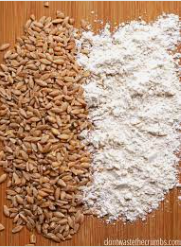

In [10]:
display(Image(f"{DOCUMENTS_PATH}/flour.png"))

* Option 2: Use tools people already built

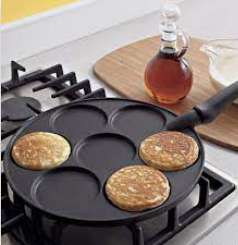

In [11]:
display(Image(f"{DOCUMENTS_PATH}/pancake.png"))

<span style="background-color: blue"><font size =3 color = white>We choose option 2:</font></span> 

<span style="background-color: lightgreen"><font size =5>Implementation:</font></span>

**To achieve our goals (aka pancakes you like), we need:**
* which libraries (utensils, baker etc.) to use
* how tools work
* define steps and procedures
* techniques of manipulating ingredients, sometime with tools, sometimes without

# Let's work on it

## which libraries (utensils, baker etc.) to use
* try to visualize the end-to-end process

**1. we open a brower <br>** 
**2. we type in the url we want to browse <br>**
**3. we read it through, maybe also take some notes <br>**
**4. we summarize in few words or sentences <br>**
**5. repeat for other urls <br>** 
<br> 


**In a technical term, steps are:**

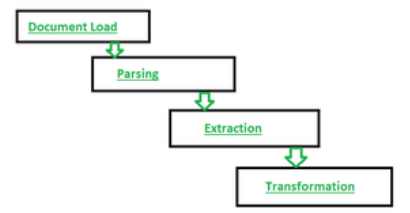

In [32]:
display(Markdown("**In a technical term, steps are:**"))
display(Image(f"{DOCUMENTS_PATH}/standard_flow.png"))

## First let's figure out which tools to use
`I am listing the tools below; explain the key ones`

In [2]:
import os 
import re 
import requests 
import numpy as np
import math
from bs4 import BeautifulSoup  
import pandas as pd 
from pathlib import Path
import nltk 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from IPython.display import Image, display, Markdown
import matplotlib.pyplot as plt
from PIL import Image as img

import wikipedia
import wordcloud

ModuleNotFoundError: No module named 'wikipedia'

**import requests**

*to visit a website url, it is take many many steps, although unseen to you. Most important part, the HTTP(or HTTPS s for secure*<br>
*requests tool or better say libary handles these: it can locate the url page and "download the content* <br>

**from bs4 import BeautifulSoup**

*Just to be clear, WHAT we see is not what we get*<br>
*we see beautiful pages, computers see lines lines of code* <br> 
*BeautifulSoup just do that. It gets its name 'tag soup' which is not good one* <br> 
 
**I will leave the others for now**

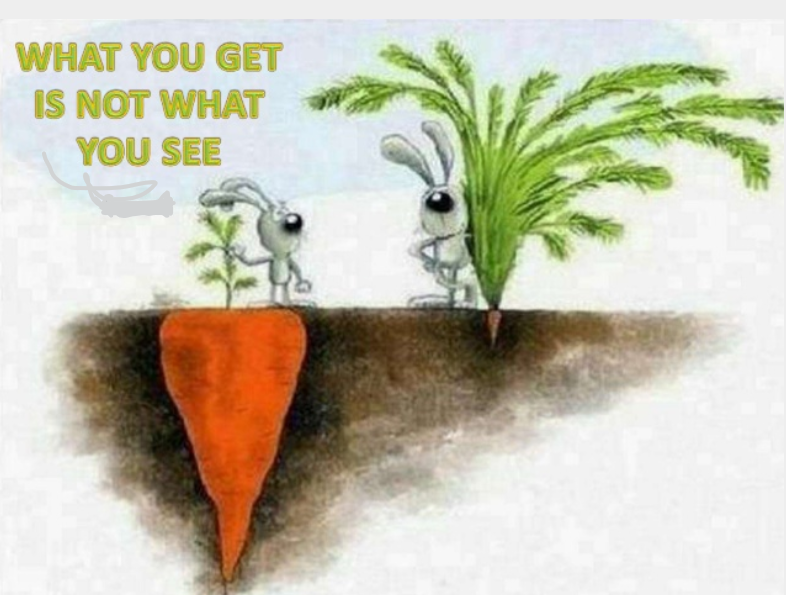

In [17]:
display(Image(f"{DOCUMENTS_PATH}/carrots.png",width=250))

## How tools work, briefly
`before we first use a tool we read instructions, briefly or in detail` <br>
`yes, ton of very informative help docs over the internet`

In [ ]:
dir(requests)

In [3]:
dir(BeautifulSoup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_decode_markup',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_markup_is_url',
 '_markup_resembles_filename',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'childGenerator',
 'children',
 'clear',
 'decode',
 'decode_content

## define steps and procedures
`yes, that is the hard part. `<br>
`we will learn the Python and design at the same time`

* first which url

In [4]:
url = "https://en.wikipedia.org/wiki/University_of_California,_Berkeley"

**1. Download:**

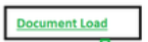

In [38]:
display(Markdown("**1. Download:**"))
display(Image(f"{DOCUMENTS_PATH}/download.png"))


In [5]:
# get url
web_content = requests.get(url) 

# display status code
print(web_content.status_code)
      
# display scrapped data
print(web_content.content[:100])

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title'


**now we downloaded the conent from web page and stored it to a "variable" called web_content**

**2. Parsing:**

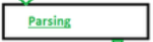

In [41]:
display(Markdown("**2. Parsing:**"))
display(Image(f"{DOCUMENTS_PATH}/parsing.png"))

In [6]:
# scrape webpage
soup = BeautifulSoup(web_content.content, 'html.parser')
 
# display scrapped data
print(soup.prettify()[:200])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   University of California, Berkeley - Wikipedia
  </title>
  <script>
   document.documentE


**this is called scraping, finally. BeautifulSoup tool, or library, has turned the download content into a readable, sort of, document. but this is not enough**

**let's do some quick spot checkk**

In [7]:
soup.title.get_text()

'University of California, Berkeley - Wikipedia'

In [8]:
soup.find_all("h1")[0].get_text()

'University of California, Berkeley'

In [9]:
soup.find_all("div", {"id":"nothing"}) 

[]

In [96]:
soup.find_all("a")[3]["href"]

'/wiki/Berkeley_College'

In [107]:
soup.find_all("link")[1] #[9]["rel"]

<link href="/w/load.php?lang=en&amp;modules=site.styles&amp;only=styles&amp;skin=vector" rel="stylesheet"/>

In [10]:
items = soup.find_all(class_="thumbinner")  
 

In [11]:
that_one = soup.find("a", {"href":"/wiki/Natalie_Coughlin"})  

In [12]:
all_h3 = soup.find_all("h3") 

In [145]:
all_h3 = soup.find_all("h3") 
head_lines = []
for h3 in all_h3[20:]:
    one = h3.find_all("span", {"class": "mw-headline"})
 
    

all_h3 = soup.find_all("div") 
head_lines = []
for h3 in all_h3[20:]:
    one = h3.find_all("p", {"class": "mw-parser-output"})
 

<font size = 6 color = red> Next Lesson we will go the next steps </font>
<font size = 6 color = red><br> But Wait:  </font>

## Did we say tools already?

In [6]:
us = wikipedia.search("UC Berkeley", results = 3)

In [7]:
print(wikipedia.summary(us[0]))

The University of California, Berkeley (UC Berkeley, Berkeley, Cal, or California) is a public land-grant research university in Berkeley, California. Established in 1868 as the University of California, it is the state's first land-grant university and the first campus of the University of California system. Its fourteen colleges and schools offer over 350 degree programs and enroll some 31,000 undergraduate and 12,000 graduate students. Berkeley is ranked among the world's top universities.A founding member of the Association of American Universities, Berkeley hosts many leading research institutes, including the Mathematical Sciences Research Institute and the Space Sciences Laboratory. It founded and maintains close relationships with three national laboratories at Berkeley, Livermore and Los Alamos, and has played a prominent role in many scientific advances, from the Manhattan Project and the discovery of 16 chemical elements to breakthroughs in computer science and genomics. Ber

In [21]:
wiki_generated_summary = wikipedia.summary(us[0]) 

wc = wordcloud.WordCloud().generate(wiki_generated_summary)

In [38]:
common_words = wordcloud.STOPWORDS
common_words.update(["California", "University", "Berkeley", "students"])

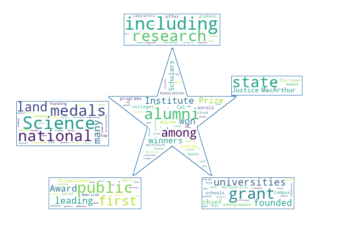

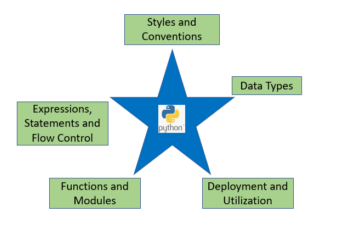

In [46]:


ucberkley_mask = np.array(img.open(f"{DOCUMENTS_PATH}/session02_02.png"))
h, w, _ = ucberkley_mask.shape 
# Create wordcloud

h, w =  h*2.2, w*2.2
wc = wordcloud.WordCloud(background_color="white", stopwords=common_words, mask=ucberkley_mask, height=h, width=w,
               contour_width=1, contour_color='steelblue'
).generate(wiki_generated_summary)

# show output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(ucberkley_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()